In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configure plotting
plt.style.use('default')
sns.set_theme(style="whitegrid")

In [2]:
# Load data
data_dir = Path('../data/raw')
train_features = pd.read_csv(data_dir / 'train_features.csv')
test_features = pd.read_csv(data_dir / 'test_features.csv')
train_labels = pd.read_csv(data_dir / 'train_labels.csv')

In [3]:
# Display basic information
print("\nDataset Shapes:")
print(f"Train features: {train_features.shape}")
print(f"Test features: {test_features.shape}")
print(f"Train labels: {train_labels.shape}")


Dataset Shapes:
Train features: (3276, 184)
Test features: (819, 184)
Train labels: (4343, 3)


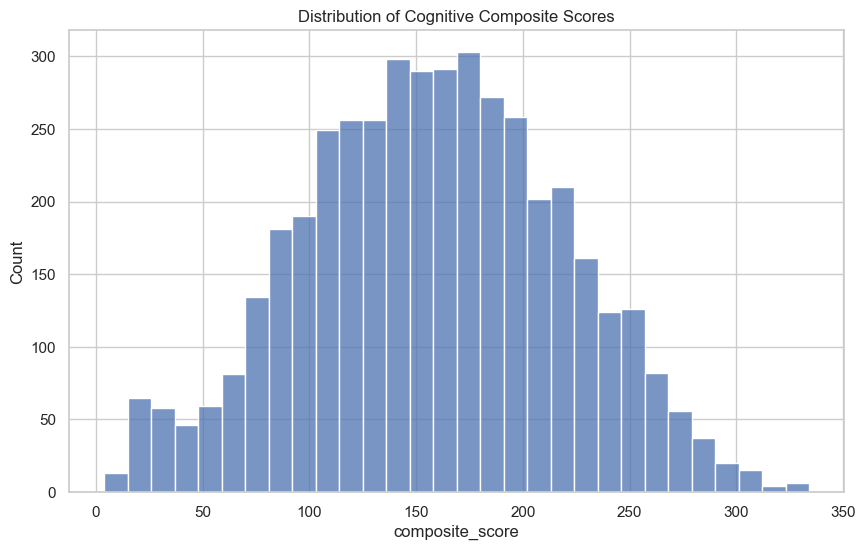


Target Variable Statistics:
count    4343.000000
mean      157.016809
std        60.909546
min         4.000000
25%       114.000000
50%       157.000000
75%       200.000000
max       334.000000
Name: composite_score, dtype: float64


In [4]:
# Target variable analysis
plt.figure(figsize=(10, 6))
sns.histplot(data=train_labels, x='composite_score', bins=30)
plt.title('Distribution of Cognitive Composite Scores')
plt.show()

print("\nTarget Variable Statistics:")
print(train_labels['composite_score'].describe())


In [ ]:
# Temporal feature analysis
features_03 = [col for col in train_features.columns if col.endswith('_03')]
features_12 = [col for col in train_features.columns if col.endswith('_12')]
other_features = [col for col in train_features.columns if not (col.endswith('_03') or col.endswith('_12'))]

print("\nFeature Counts by Year:")
print(f"2003 features: {len(features_03)}")
print(f"2012 features: {len(features_12)}")
print(f"Year-agnostic features: {len(other_features)}")



Feature Counts by Year:
2003 features: 75
2012 features: 105
Year-agnostic features: 4


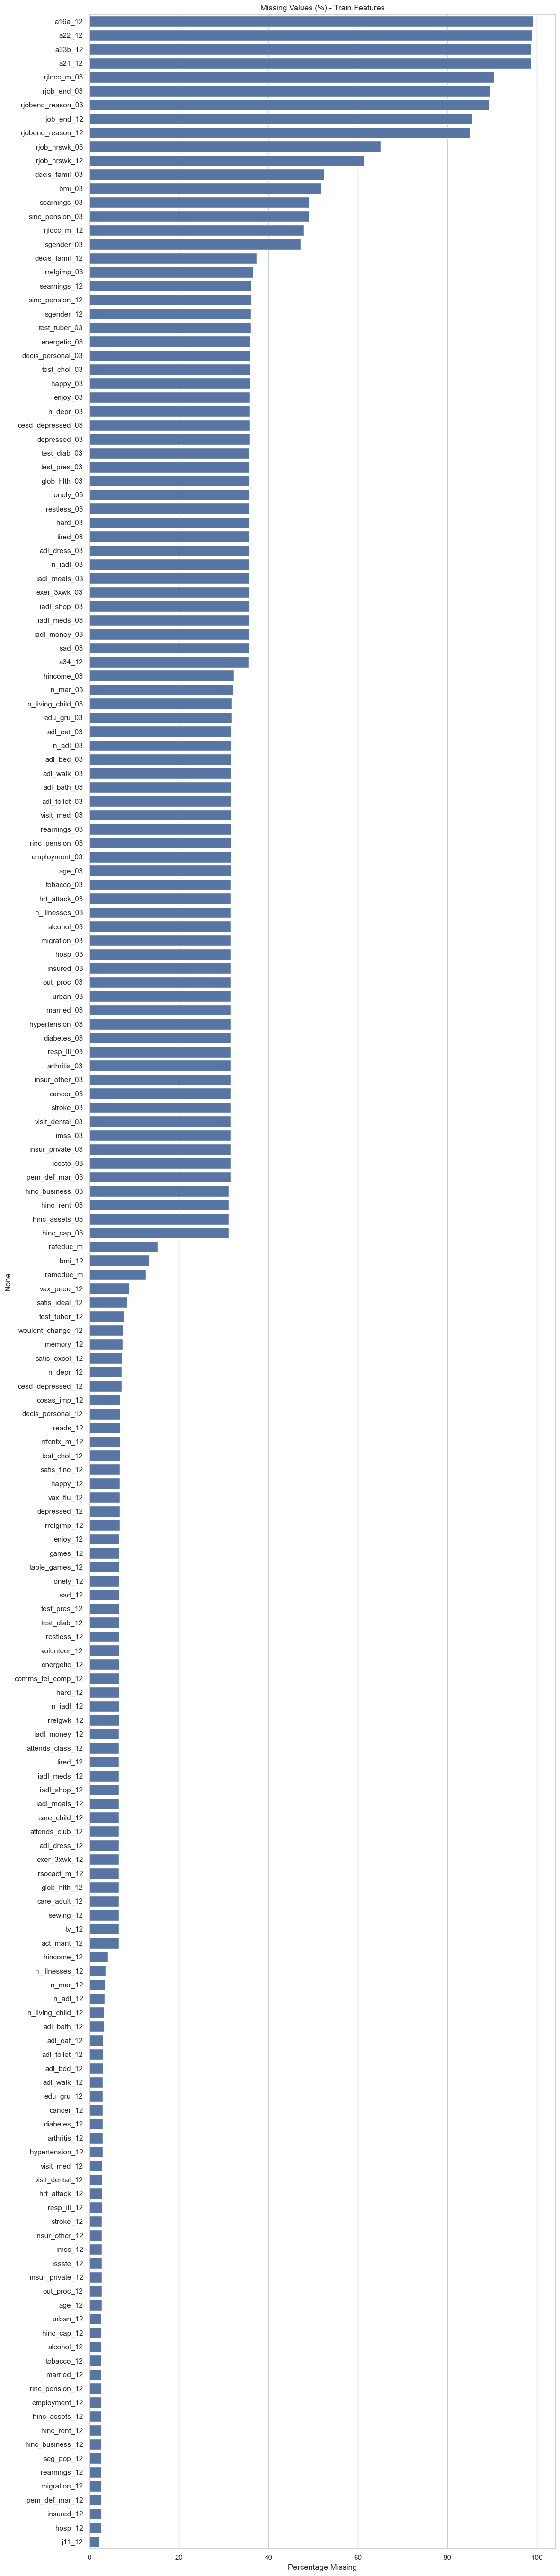


Features with highest missing rates (Train Features):
a16a_12        99.267399
a22_12         98.901099
a33b_12        98.717949
a21_12         98.717949
rjlocc_m_03    90.506716
dtype: float64


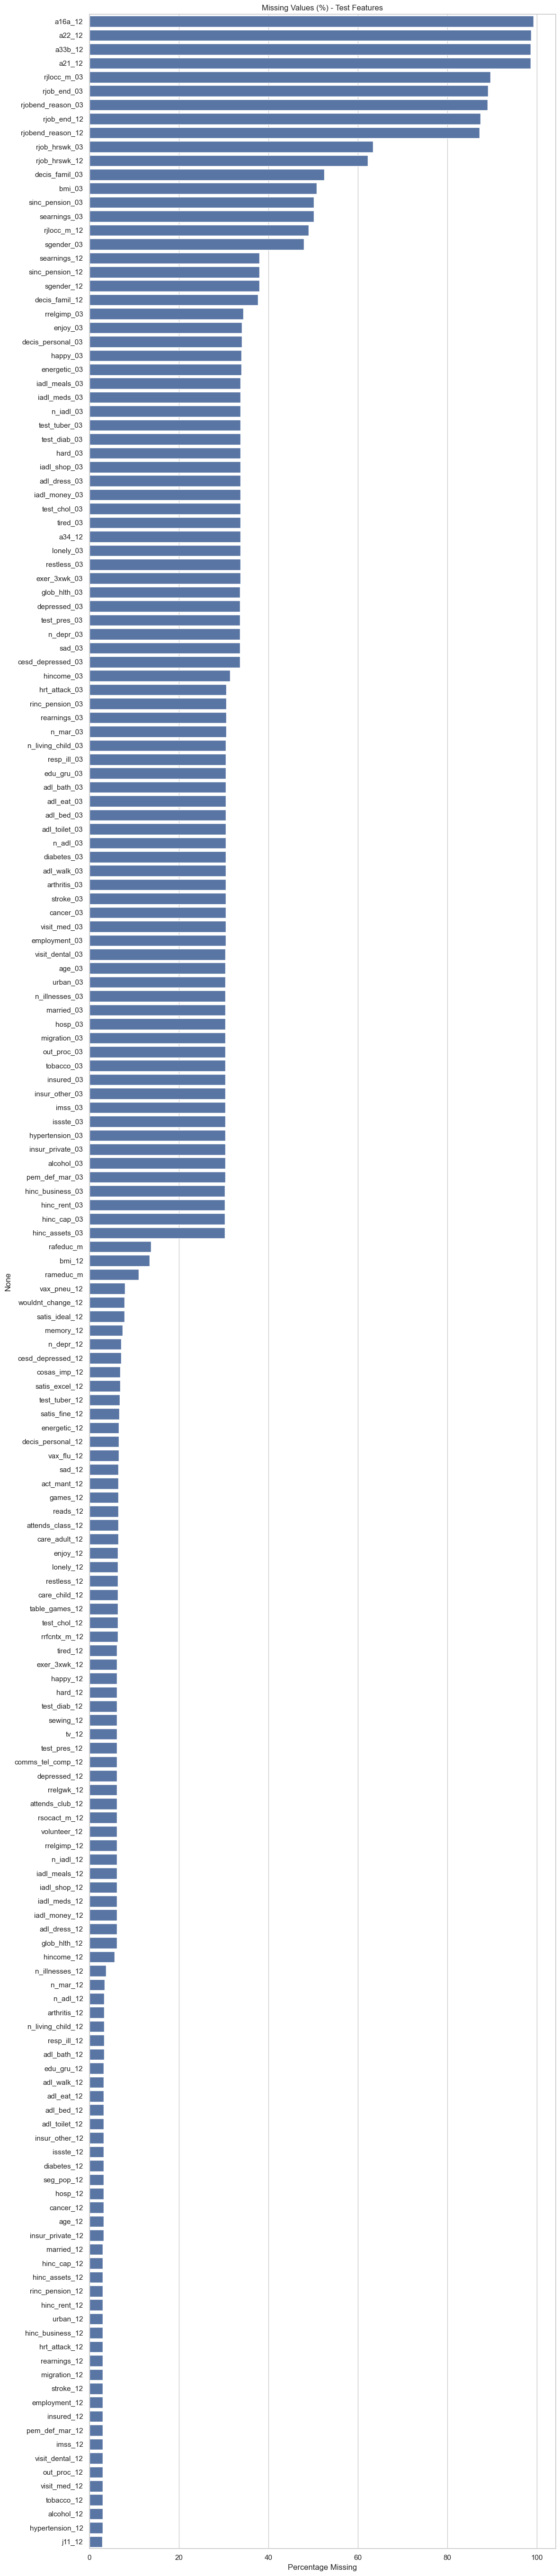


Features with highest missing rates (Test Features):
a16a_12        99.267399
a22_12         98.778999
a33b_12        98.656899
a21_12         98.656899
rjlocc_m_03    89.621490
dtype: float64


In [6]:
# Missing values analysis
def analyze_missing_values(df, title):
    missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_pct = missing_pct[missing_pct > 0]
    
    if len(missing_pct) > 0:
        plt.figure(figsize=(12, max(6, len(missing_pct) * 0.3)))
        sns.barplot(x=missing_pct.values, y=missing_pct.index)
        plt.title(f'Missing Values (%) - {title}')
        plt.xlabel('Percentage Missing')
        plt.tight_layout()
        plt.show()
        
        print(f"\nFeatures with highest missing rates ({title}):")
        print(missing_pct.head())

analyze_missing_values(train_features, 'Train Features')
analyze_missing_values(test_features, 'Test Features')


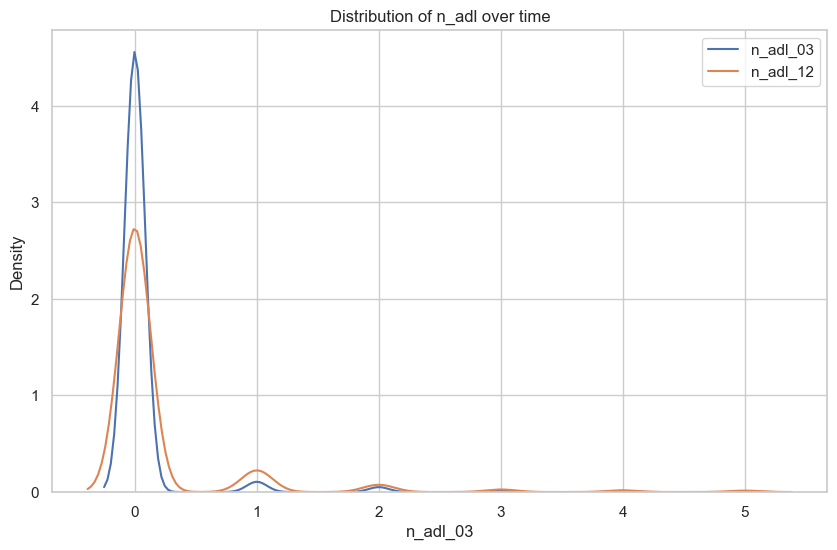

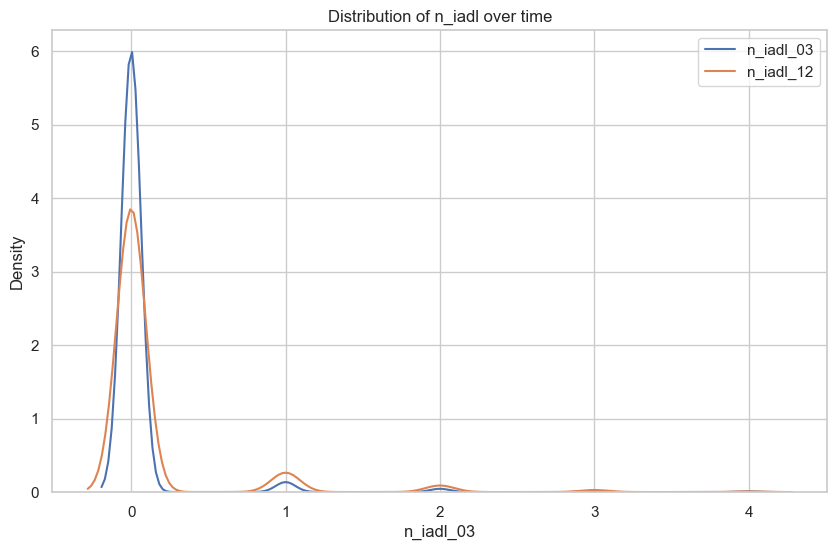

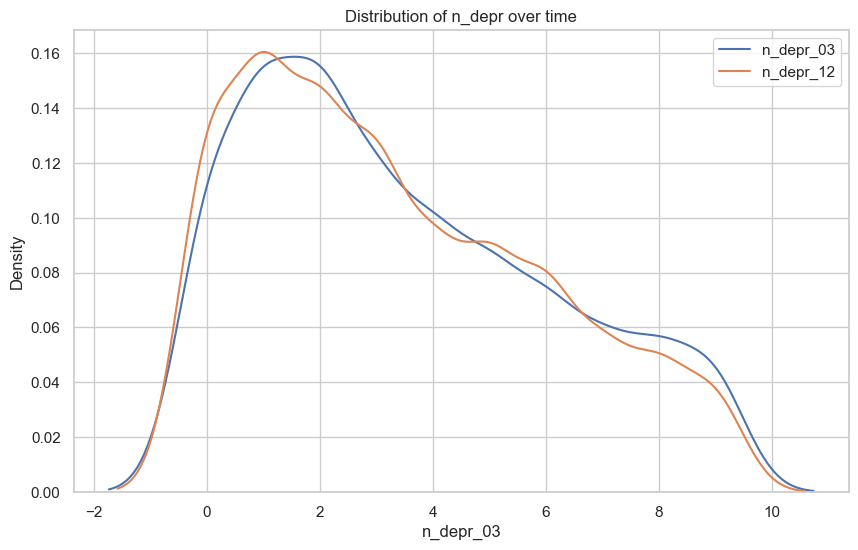

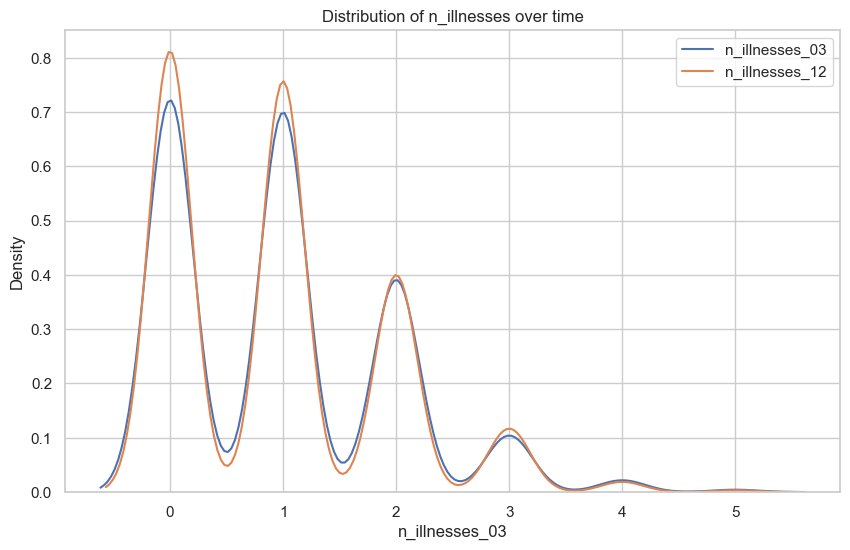

In [7]:
# Analyze key health indicators
health_indicators = [
    'n_adl', 'n_iadl', 'n_depr', 'n_illnesses', 'memory'
]

def analyze_health_indicators(df, indicators):
    for indicator in indicators:
        cols = [col for col in df.columns if indicator in col]
        if len(cols) >= 2:  # If we have both 2003 and 2012 data
            plt.figure(figsize=(10, 6))
            for col in cols:
                sns.kdeplot(data=df[col].dropna(), label=col)
            plt.title(f'Distribution of {indicator} over time')
            plt.legend()
            plt.show()

analyze_health_indicators(train_features, health_indicators)


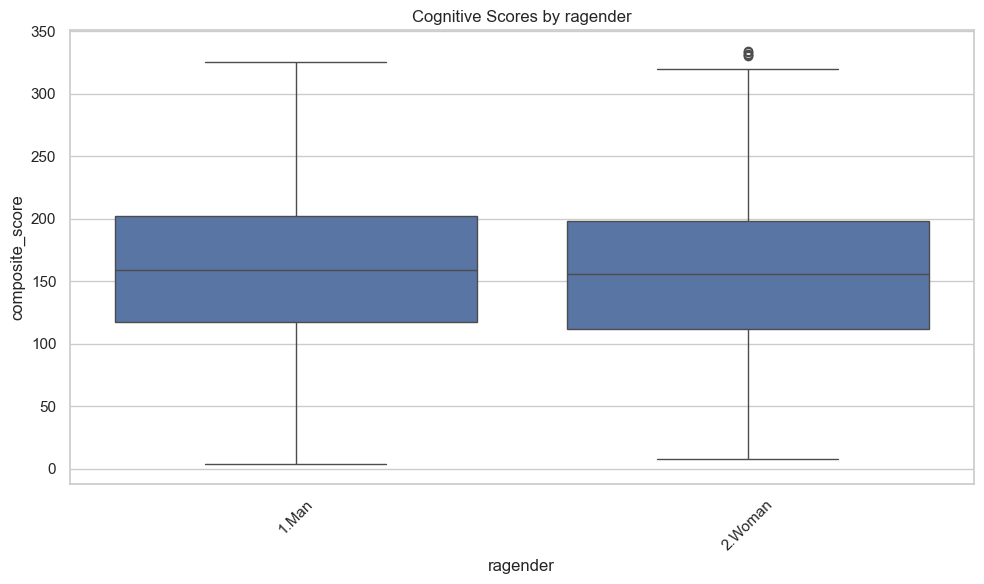


Score statistics by ragender:
           count        mean        std  min    25%    50%     75%    max
ragender                                                                 
1.Man     1818.0  159.512651  59.664584  4.0  117.0  159.0  201.75  325.0
2.Woman   2525.0  155.219802  61.739680  8.0  112.0  156.0  198.00  334.0


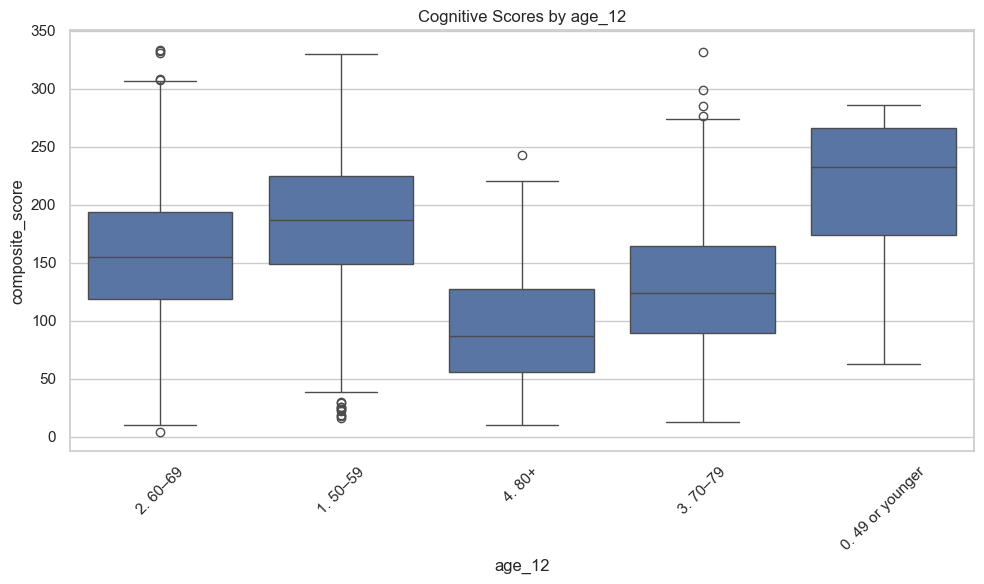


Score statistics by age_12:
                   count        mean        std   min     25%    50%     75%  \
age_12                                                                         
0. 49 or younger     8.0  206.500000  83.201992  63.0  173.75  232.5  266.75   
1. 50–59          1347.0  185.936154  55.260739  16.0  149.00  187.0  225.00   
2. 60–69          1804.0  156.601441  55.595223   4.0  119.00  155.5  194.25   
3. 70–79           871.0  126.919633  55.294596  13.0   90.00  124.0  164.50   
4. 80+             204.0   94.112745  52.230467  10.0   55.75   87.0  127.50   

                    max  
age_12                   
0. 49 or younger  286.0  
1. 50–59          330.0  
2. 60–69          334.0  
3. 70–79          332.0  
4. 80+            243.0  


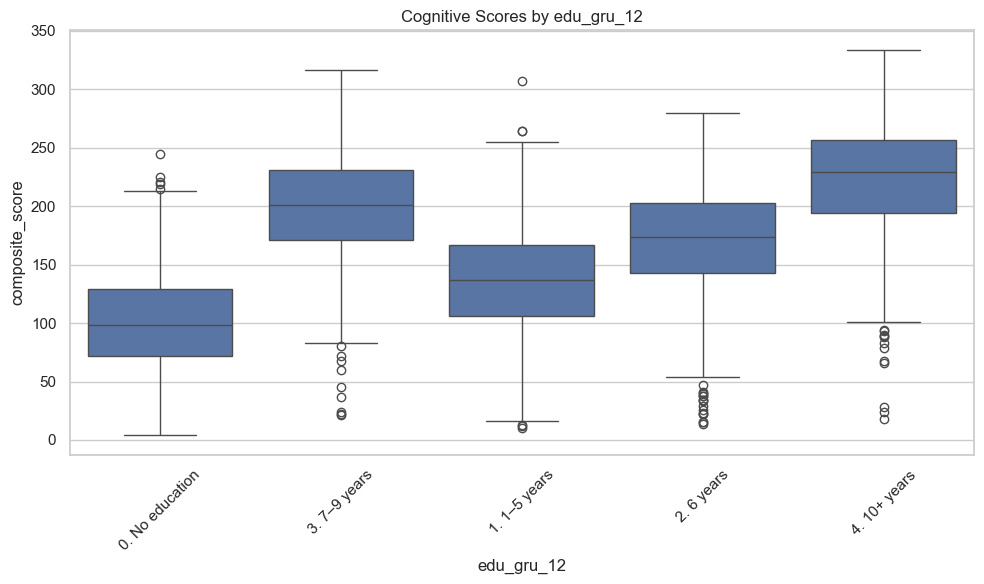


Score statistics by edu_gru_12:
                  count        mean        std   min    25%    50%     75%  \
edu_gru_12                                                                   
0. No education   717.0   99.115760  42.730633   4.0   72.0   98.0  129.00   
1. 1–5 years     1459.0  135.501028  45.996666  10.0  106.0  137.0  167.00   
2. 6 years        862.0  170.367749  46.621769  14.0  143.0  174.0  202.75   
3. 7–9 years      688.0  198.547965  47.254312  21.0  171.0  201.0  231.25   
4. 10+ years      495.0  222.684848  51.457794  18.0  194.0  229.0  257.00   

                   max  
edu_gru_12              
0. No education  245.0  
1. 1–5 years     307.0  
2. 6 years       280.0  
3. 7–9 years     317.0  
4. 10+ years     334.0  


In [8]:
# Demographic analysis
def analyze_demographics(features_df, labels_df, demographic_cols):
    merged = features_df.merge(labels_df, on='uid', how='inner')
    
    for col in demographic_cols:
        if col in merged.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=merged, x=col, y='composite_score')
            plt.title(f'Cognitive Scores by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            print(f"\nScore statistics by {col}:")
            print(merged.groupby(col)['composite_score'].describe())

demographic_cols = ['ragender', 'age_12', 'edu_gru_12']
analyze_demographics(train_features, train_labels, demographic_cols)



Top 10 feature correlations with cognitive score:
composite_score      1.000000
reads_12             0.364368
games_12             0.300257
insured_03           0.243065
rearnings_03         0.242364
comms_tel_comp_12    0.240622
table_games_12       0.223403
visit_dental_03      0.217996
hincome_03           0.209746
searnings_03         0.190214
Name: composite_score, dtype: float64


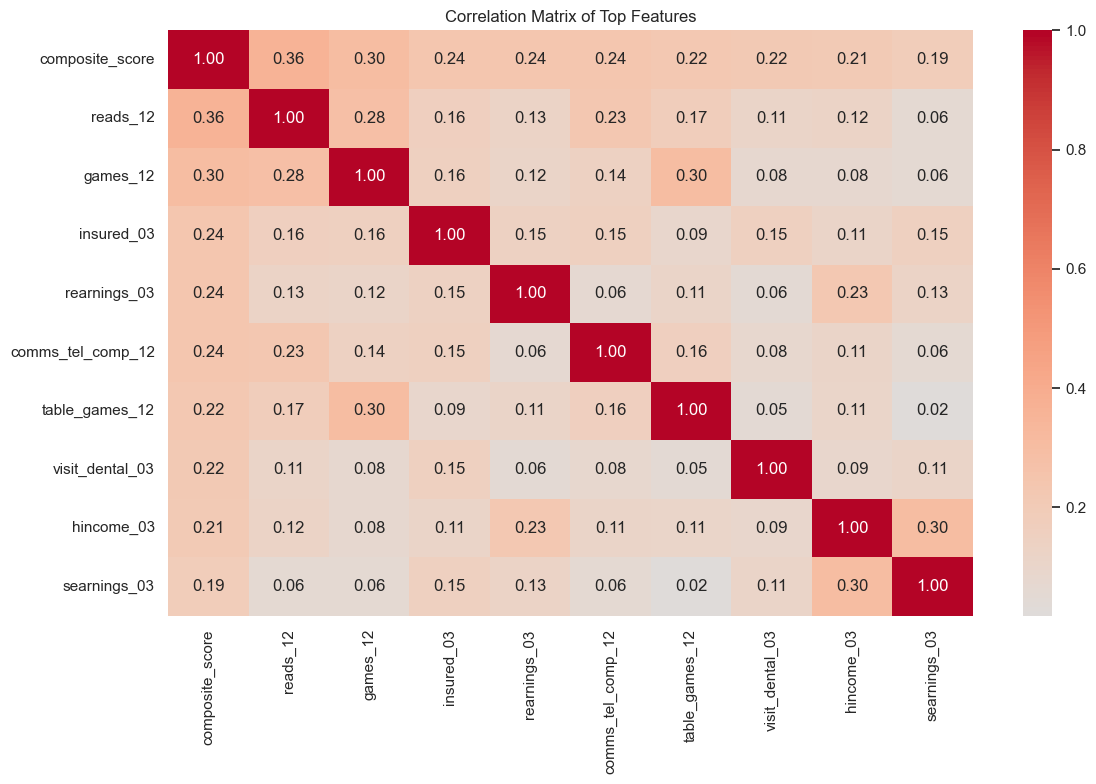

In [9]:
# Feature correlations with target
def analyze_feature_correlations(features_df, labels_df, n_top=10):
    merged = features_df.merge(labels_df, on='uid', how='inner')
    numeric_cols = merged.select_dtypes(include=['int64', 'float64']).columns
    correlations = merged[numeric_cols].corr()['composite_score'].sort_values(ascending=False)
    
    print(f"\nTop {n_top} feature correlations with cognitive score:")
    print(correlations[:n_top])
    
    # Correlation heatmap of top features
    top_features = correlations[:n_top].index
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        merged[top_features].corr(),
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0
    )
    plt.title('Correlation Matrix of Top Features')
    plt.tight_layout()
    plt.show()

analyze_feature_correlations(train_features, train_labels)


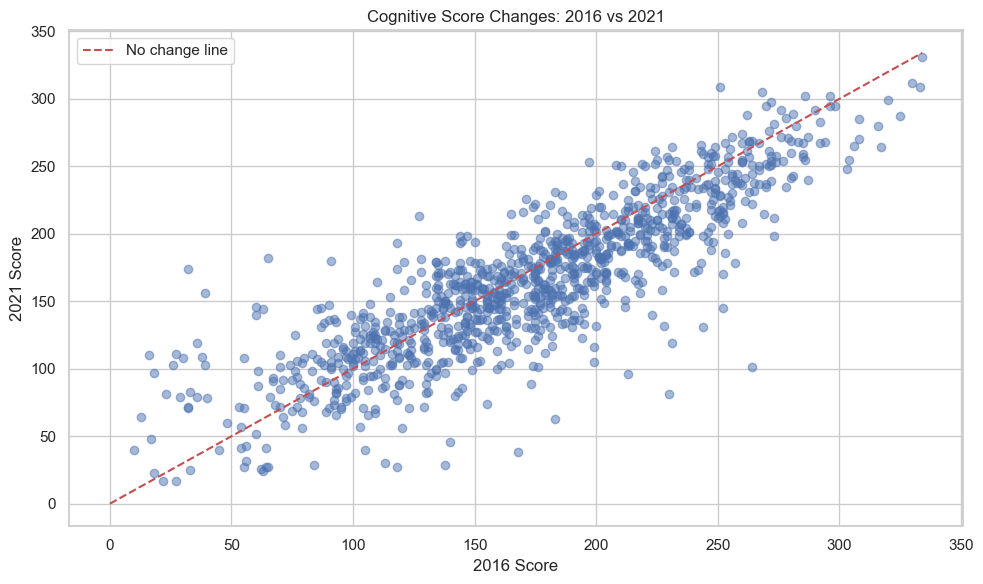


Longitudinal Change Statistics:
count    1067.000000
mean       -7.645736
std        31.355495
min      -163.000000
25%       -26.000000
50%        -8.000000
75%        11.000000
max       142.000000
dtype: float64


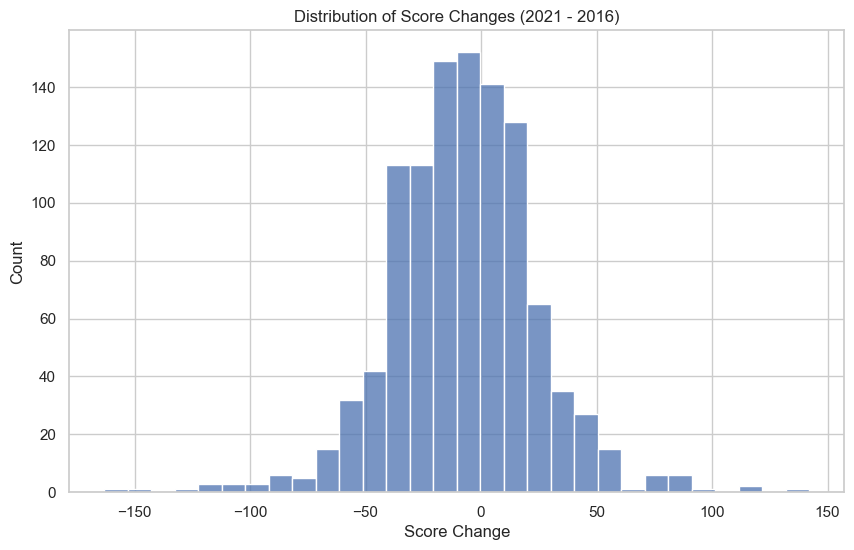

In [10]:
# Longitudinal analysis
def analyze_longitudinal_changes(labels_df):
    # Get individuals with scores in both years
    pivot_scores = labels_df.pivot(index='uid', columns='year', values='composite_score').dropna()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(pivot_scores[2016], pivot_scores[2021], alpha=0.5)
    plt.plot([0, pivot_scores.max().max()], [0, pivot_scores.max().max()], 'r--', label='No change line')
    plt.xlabel('2016 Score')
    plt.ylabel('2021 Score')
    plt.title('Cognitive Score Changes: 2016 vs 2021')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    changes = pivot_scores[2021] - pivot_scores[2016]
    print("\nLongitudinal Change Statistics:")
    print(changes.describe())
    
    plt.figure(figsize=(10, 6))
    sns.histplot(changes, bins=30)
    plt.title('Distribution of Score Changes (2021 - 2016)')
    plt.xlabel('Score Change')
    plt.show()

analyze_longitudinal_changes(train_labels)


In [11]:
# Summary statistics
print("\nOverall Summary Statistics:")
summary_stats = {
    'Sample Size': len(train_features),
    'Number of Features': train_features.shape[1],
    'Target Mean': train_labels['composite_score'].mean(),
    'Target Std': train_labels['composite_score'].std(),
    'Missing Rate': (train_features.isnull().sum().sum() / (train_features.shape[0] * train_features.shape[1])) * 100,
    'Temporal Features': len(features_03),
    'Categorical Features': len(train_features.select_dtypes(include=['object']).columns)
}

for key, value in summary_stats.items():
    print(f"{key}: {value:.2f}")


Overall Summary Statistics:
Sample Size: 3276.00
Number of Features: 184.00
Target Mean: 157.02
Target Std: 60.91
Missing Rate: 22.45
Temporal Features: 75.00
Categorical Features: 44.00


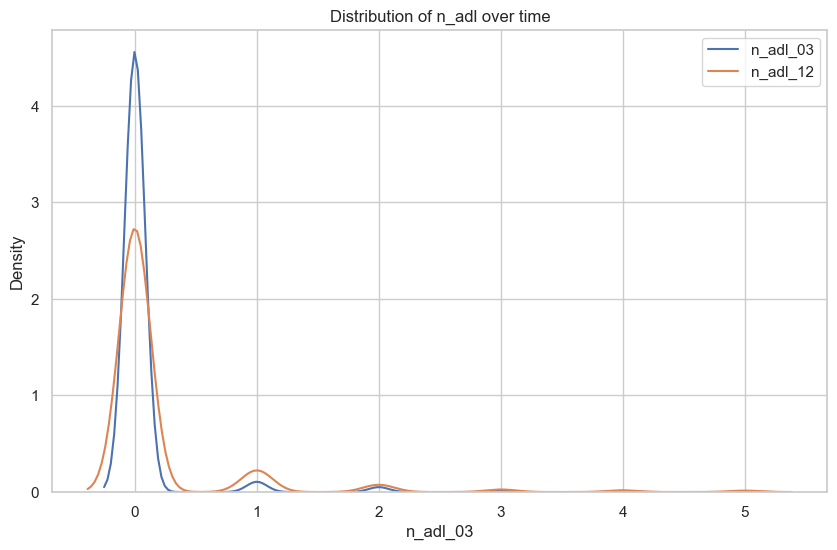

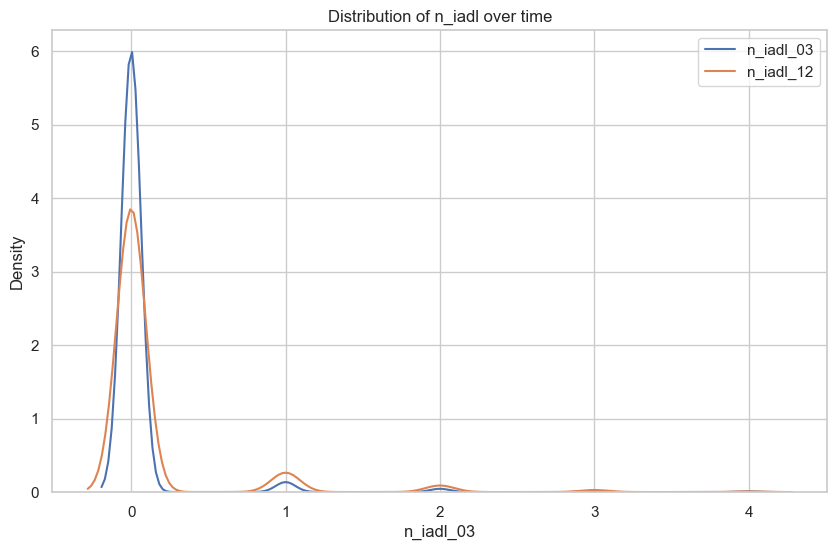

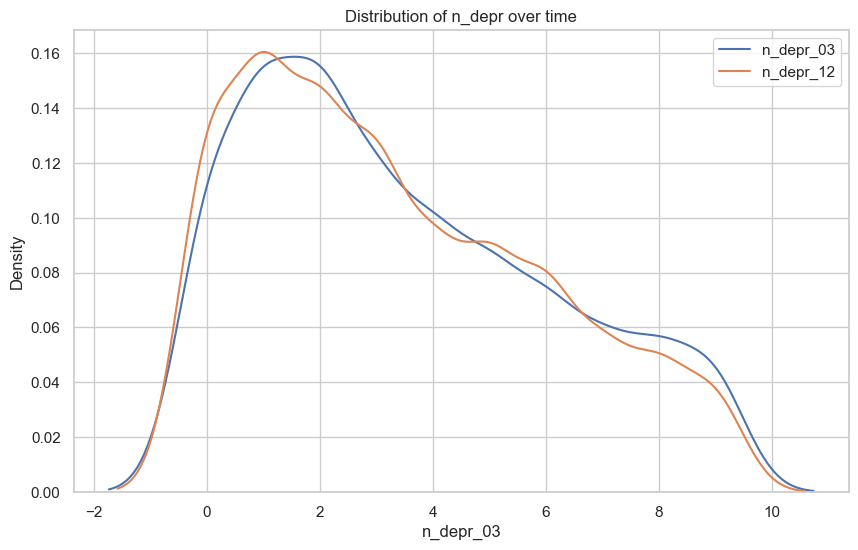

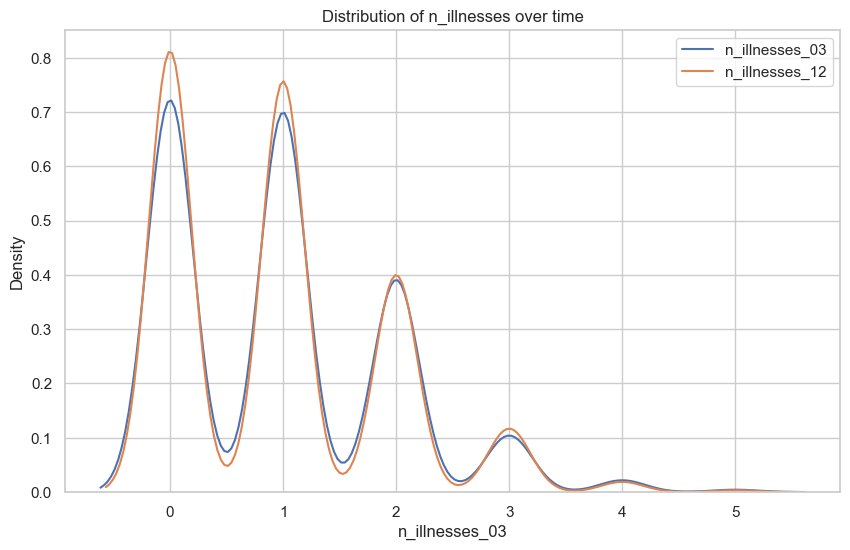

In [12]:
# Analyze key health indicators
health_indicators = [
    'n_adl', 'n_iadl', 'n_depr', 'n_illnesses', 'memory'
]

def analyze_health_indicators(df, indicators):
    for indicator in indicators:
        cols = [col for col in df.columns if indicator in col]
        if len(cols) >= 2:  # If we have both 2003 and 2012 data
            plt.figure(figsize=(10, 6))
            for col in cols:
                sns.kdeplot(data=df[col].dropna(), label=col)
            plt.title(f'Distribution of {indicator} over time')
            plt.legend()
            plt.show()

analyze_health_indicators(train_features, health_indicators)



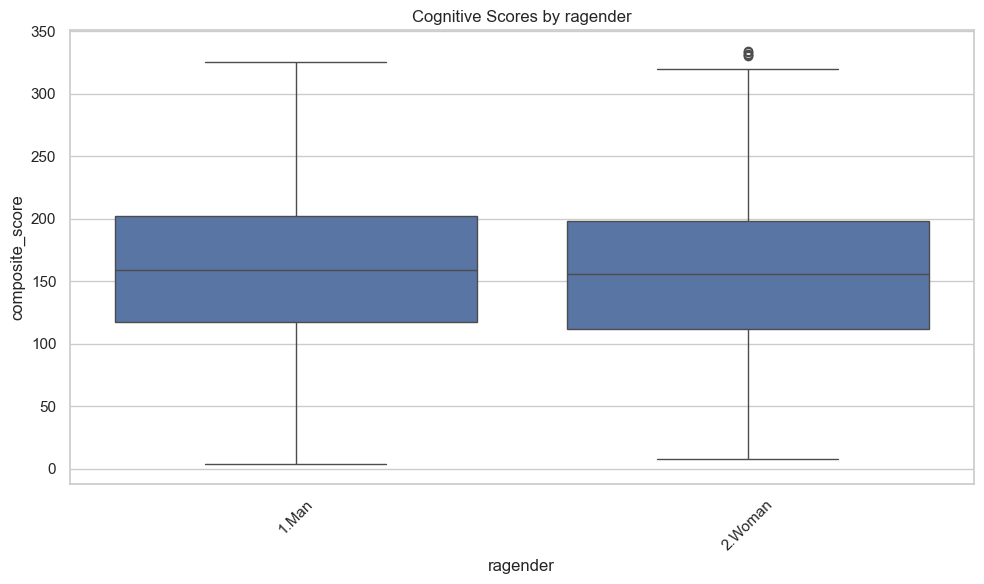


Score statistics by ragender:
           count        mean        std  min    25%    50%     75%    max
ragender                                                                 
1.Man     1818.0  159.512651  59.664584  4.0  117.0  159.0  201.75  325.0
2.Woman   2525.0  155.219802  61.739680  8.0  112.0  156.0  198.00  334.0


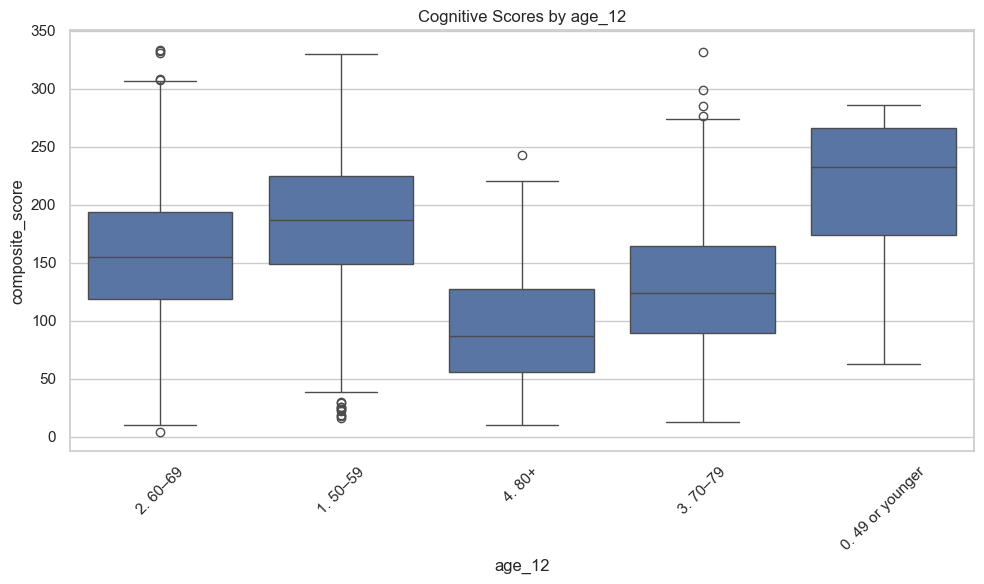


Score statistics by age_12:
                   count        mean        std   min     25%    50%     75%  \
age_12                                                                         
0. 49 or younger     8.0  206.500000  83.201992  63.0  173.75  232.5  266.75   
1. 50–59          1347.0  185.936154  55.260739  16.0  149.00  187.0  225.00   
2. 60–69          1804.0  156.601441  55.595223   4.0  119.00  155.5  194.25   
3. 70–79           871.0  126.919633  55.294596  13.0   90.00  124.0  164.50   
4. 80+             204.0   94.112745  52.230467  10.0   55.75   87.0  127.50   

                    max  
age_12                   
0. 49 or younger  286.0  
1. 50–59          330.0  
2. 60–69          334.0  
3. 70–79          332.0  
4. 80+            243.0  


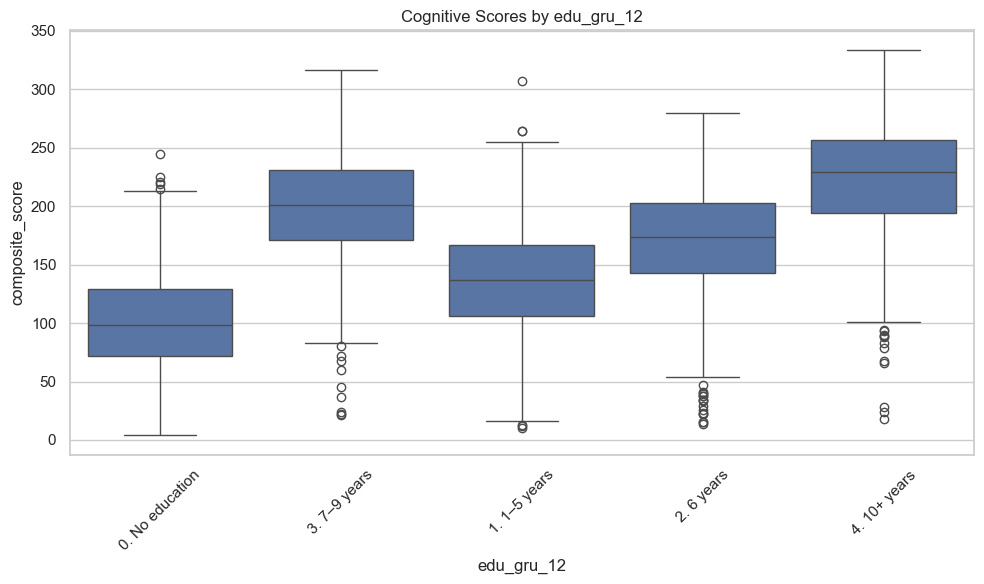


Score statistics by edu_gru_12:
                  count        mean        std   min    25%    50%     75%  \
edu_gru_12                                                                   
0. No education   717.0   99.115760  42.730633   4.0   72.0   98.0  129.00   
1. 1–5 years     1459.0  135.501028  45.996666  10.0  106.0  137.0  167.00   
2. 6 years        862.0  170.367749  46.621769  14.0  143.0  174.0  202.75   
3. 7–9 years      688.0  198.547965  47.254312  21.0  171.0  201.0  231.25   
4. 10+ years      495.0  222.684848  51.457794  18.0  194.0  229.0  257.00   

                   max  
edu_gru_12              
0. No education  245.0  
1. 1–5 years     307.0  
2. 6 years       280.0  
3. 7–9 years     317.0  
4. 10+ years     334.0  


In [13]:
# Demographic analysis
def analyze_demographics(features_df, labels_df, demographic_cols):
    merged = features_df.merge(labels_df, on='uid', how='inner')
    
    for col in demographic_cols:
        if col in merged.columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=merged, x=col, y='composite_score')
            plt.title(f'Cognitive Scores by {col}')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            
            print(f"\nScore statistics by {col}:")
            print(merged.groupby(col)['composite_score'].describe())

demographic_cols = ['ragender', 'age_12', 'edu_gru_12']
analyze_demographics(train_features, train_labels, demographic_cols)




Top 10 feature correlations with cognitive score:
composite_score      1.000000
reads_12             0.364368
games_12             0.300257
insured_03           0.243065
rearnings_03         0.242364
comms_tel_comp_12    0.240622
table_games_12       0.223403
visit_dental_03      0.217996
hincome_03           0.209746
searnings_03         0.190214
Name: composite_score, dtype: float64


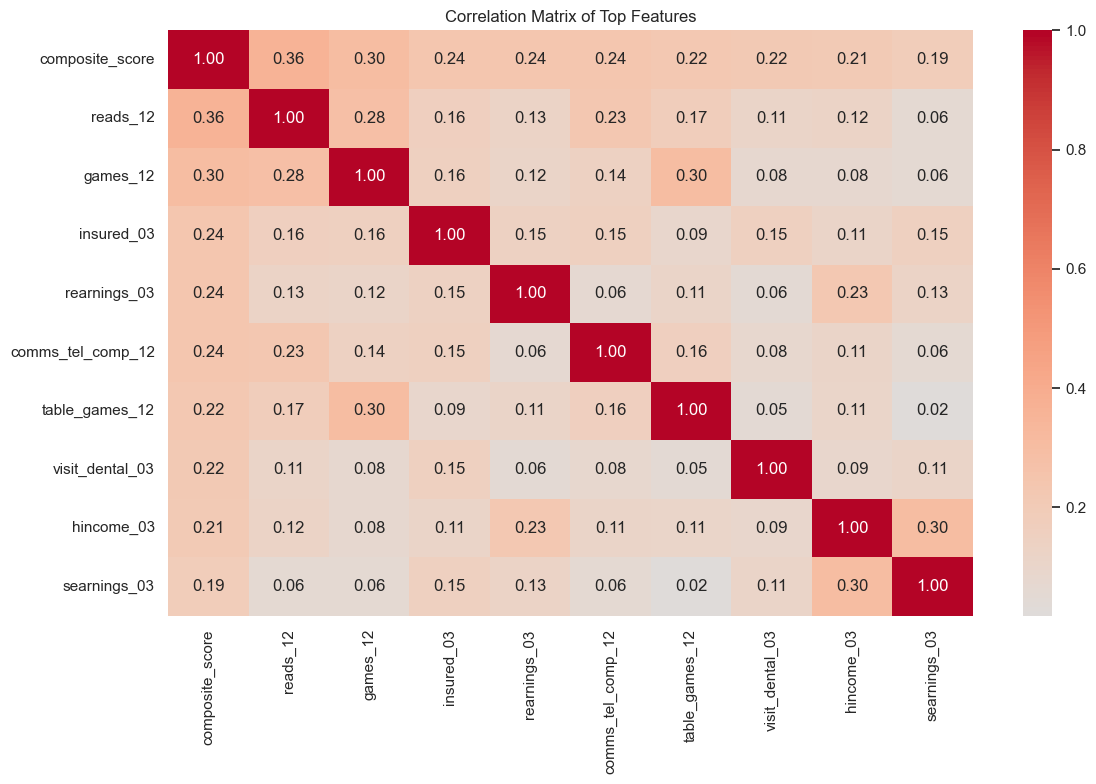

In [14]:
# Feature correlations with target
def analyze_feature_correlations(features_df, labels_df, n_top=10):
    merged = features_df.merge(labels_df, on='uid', how='inner')
    numeric_cols = merged.select_dtypes(include=['int64', 'float64']).columns
    correlations = merged[numeric_cols].corr()['composite_score'].sort_values(ascending=False)
    
    print(f"\nTop {n_top} feature correlations with cognitive score:")
    print(correlations[:n_top])
    
    # Correlation heatmap of top features
    top_features = correlations[:n_top].index
    plt.figure(figsize=(12, 8))
    sns.heatmap(
        merged[top_features].corr(),
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0
    )
    plt.title('Correlation Matrix of Top Features')
    plt.tight_layout()
    plt.show()

analyze_feature_correlations(train_features, train_labels)



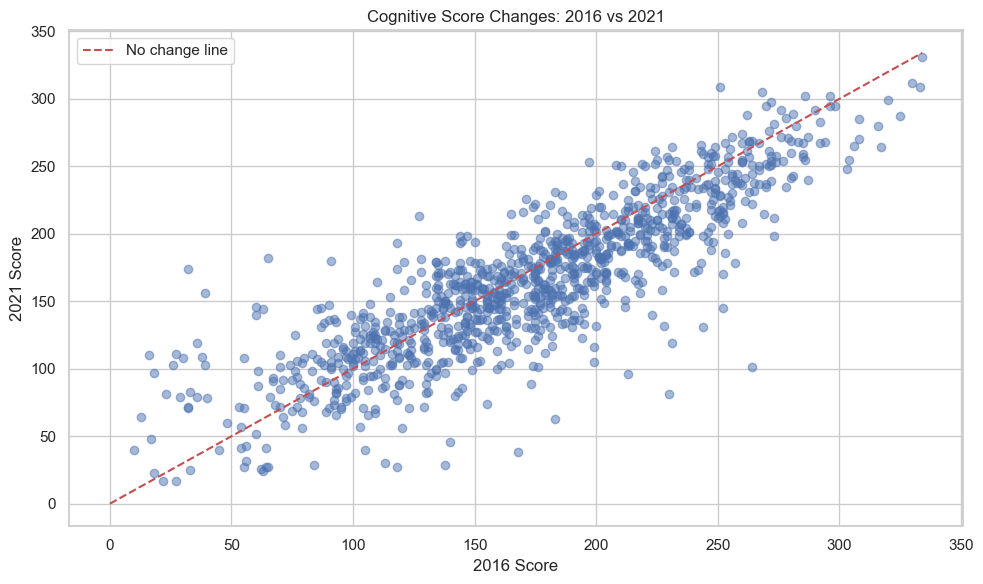


Longitudinal Change Statistics:
count    1067.000000
mean       -7.645736
std        31.355495
min      -163.000000
25%       -26.000000
50%        -8.000000
75%        11.000000
max       142.000000
dtype: float64


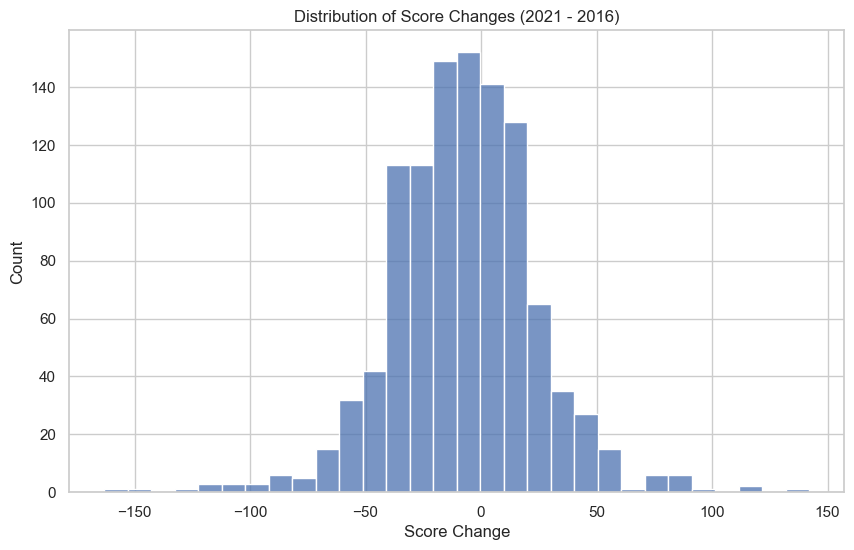

In [15]:
# Longitudinal analysis
def analyze_longitudinal_changes(labels_df):
    # Get individuals with scores in both years
    pivot_scores = labels_df.pivot(index='uid', columns='year', values='composite_score').dropna()
    
    plt.figure(figsize=(10, 6))
    plt.scatter(pivot_scores[2016], pivot_scores[2021], alpha=0.5)
    plt.plot([0, pivot_scores.max().max()], [0, pivot_scores.max().max()], 'r--', label='No change line')
    plt.xlabel('2016 Score')
    plt.ylabel('2021 Score')
    plt.title('Cognitive Score Changes: 2016 vs 2021')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    changes = pivot_scores[2021] - pivot_scores[2016]
    print("\nLongitudinal Change Statistics:")
    print(changes.describe())
    
    plt.figure(figsize=(10, 6))
    sns.histplot(changes, bins=30)
    plt.title('Distribution of Score Changes (2021 - 2016)')
    plt.xlabel('Score Change')
    plt.show()

analyze_longitudinal_changes(train_labels)



In [16]:
# Summary statistics
print("\nOverall Summary Statistics:")
summary_stats = {
    'Sample Size': len(train_features),
    'Number of Features': train_features.shape[1],
    'Target Mean': train_labels['composite_score'].mean(),
    'Target Std': train_labels['composite_score'].std(),
    'Missing Rate': (train_features.isnull().sum().sum() / (train_features.shape[0] * train_features.shape[1])) * 100,
    'Temporal Features': len(features_03),
    'Categorical Features': len(train_features.select_dtypes(include=['object']).columns)
}

for key, value in summary_stats.items():
    print(f"{key}: {value:.2f}")


Overall Summary Statistics:
Sample Size: 3276.00
Number of Features: 184.00
Target Mean: 157.02
Target Std: 60.91
Missing Rate: 22.45
Temporal Features: 75.00
Categorical Features: 44.00
